In [2]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heart = pd.read_csv('data/heart.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [10]:
heart['old'].sum()

79

In [23]:
for i in heart.index:
    if heart.loc[i,'sex'] == 1:
        if heart.loc[i,'age'] < 20:
            heart.loc[i,'trestbps_mean'] = '123'
        if 21 <= heart.loc[i,'age'] <= 30:
            heart.loc[i,'trestbps_mean'] = '126'
        if 31 <= heart.loc[i,'age'] <= 40:
            heart.loc[i,'trestbps_mean'] = '129'
        if 41 <= heart.loc[i,'age'] <= 50:
            heart.loc[i,'trestbps_mean'] = '135'
        if 51 <= heart.loc[i,'age'] <= 60:
            heart.loc[i,'trestbps_mean'] = '142'
        if 61 <= heart.loc[i,'age']:
            heart.loc[i,'trestbps_mean'] = '142'
    if heart.loc[i,'sex'] == 0:
        if heart.loc[i,'age'] < 20:
            heart.loc[i,'trestbps_mean'] = '116'
        if 21 <= heart.loc[i,'age'] <= 30:
            heart.loc[i,'trestbps_mean'] = '120'
        if 31 <= heart.loc[i,'age'] <= 40:
            heart.loc[i,'trestbps_mean'] = '127'
        if 41 <= heart.loc[i,'age'] <= 50:
            heart.loc[i,'trestbps_mean'] = '137'
        if 51 <= heart.loc[i,'age'] <= 60:
            heart.loc[i,'trestbps_mean'] = '144'
        if 61 <= heart.loc[i,'age']:
            heart.loc[i,'trestbps_mean'] = '159'
            


In [24]:
heart.loc[300, 'trestbps_mean']

'142'

In [25]:
heart.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,142
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0,144
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,0,135
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,142
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0,142


In [38]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp']) 
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['restecg'])
type_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['slope'])
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['ca'])
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['thal'])
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)

In [39]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [48]:
from sklearn import preprocessing

col_names = heart.columns
r_scaler = preprocessing.RobustScaler()

heart_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r = pd.DataFrame(heart_r, columns=col_names)

heart_r

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,...,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,...,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0


In [52]:
heart_r.std()

age              0.672748
sex              0.466011
cp               0.516026
trestbps         0.876907
chol             0.816232
fbs              0.356198
restecg          0.525860
thalach          0.704774
exang            0.469794
oldpeak          0.725672
slope            0.616226
ca               1.022606
thal             0.612277
target           0.498835
old              0.439757
trestbps_mean    1.487564
cp_1             0.265288
cp_2             0.453171
cp_3             0.371809
cp_4             0.500038
restecg_1        0.500606
restecg_2        0.500824
restecg_3        0.114325
slope_1          0.254395
slope_2          0.499842
slope_3          0.499382
ca_1             0.494765
ca_2             0.331734
ca_3             0.411169
ca_4             0.248704
ca_5             0.127605
thal_1           0.236774
thal_2           0.498528
thal_3           0.487668
thal_4           0.081110
dtype: float64

<AxesSubplot: >

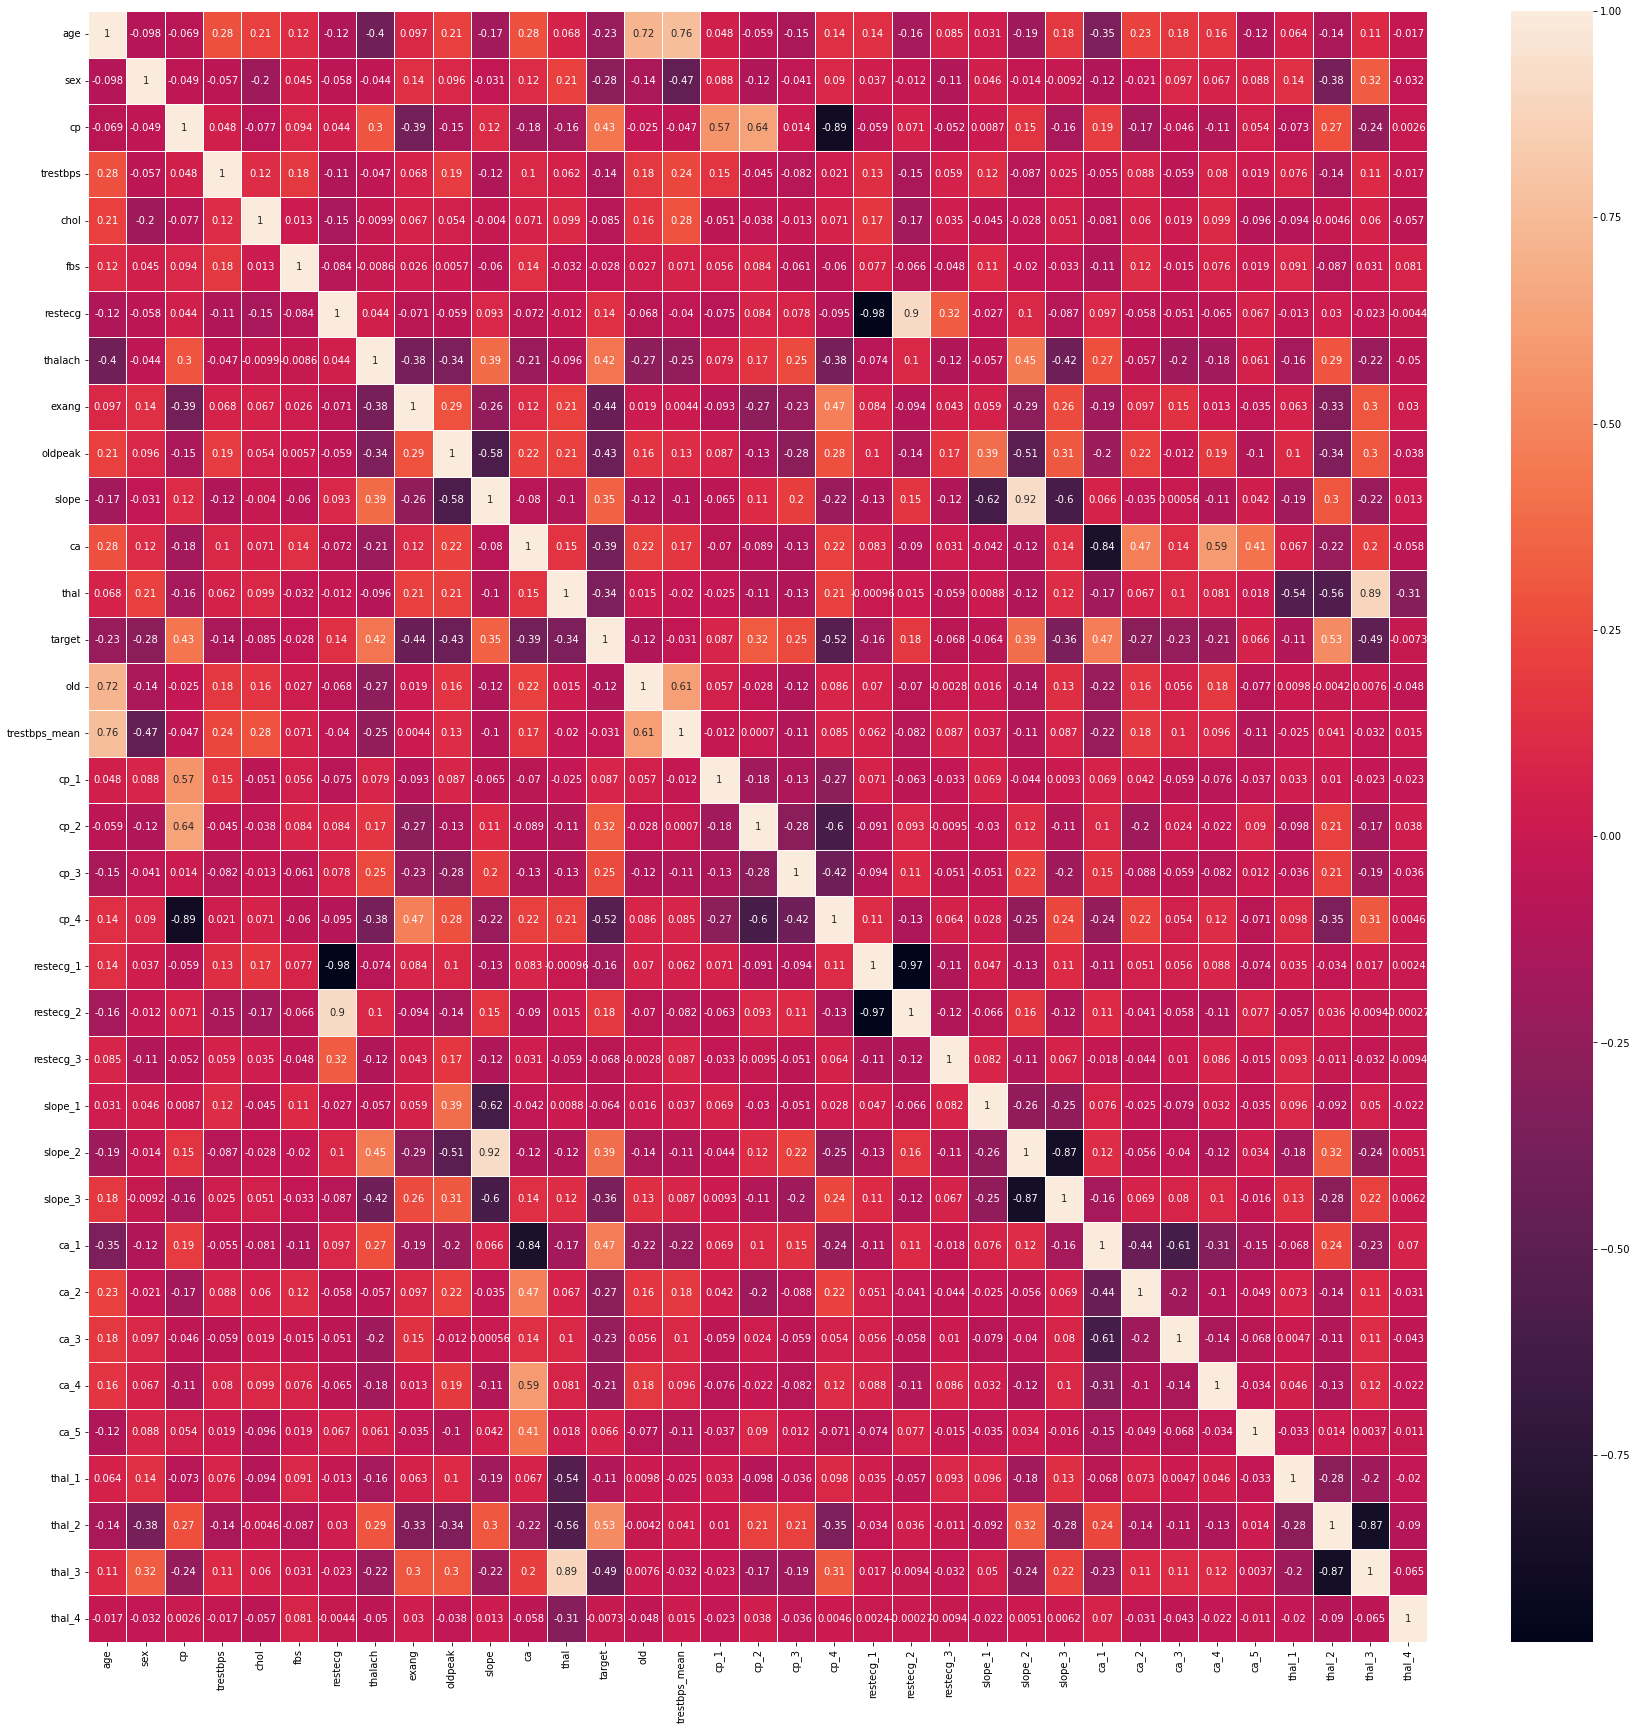

In [54]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(heart_r.corr(), annot=True, linewidths=.5) 

